In [140]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [71]:
!pip install xgboost

In [141]:
# Importing the Boston House Price Dataset
House_price_data=sklearn.datasets.load_boston()

In [142]:
House_price_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [143]:
# Converting dataset into pandas dataframe
df=pd.DataFrame(House_price_data.data,columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
"""
CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per 10,000usd
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT % lower status of the population

Each record in the database describes a Boston suburb or town.
""""

In [146]:
# Adding traget column in our dataframe
df['price']=House_price_data.target

In [147]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [148]:
# Print shape of df
df.shape

(506, 14)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [150]:
# check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [151]:
# Checking for duplicates values
df.duplicated().sum()

0

In [152]:
# Gives statistical measures of dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [153]:
# finds correlation between cols
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

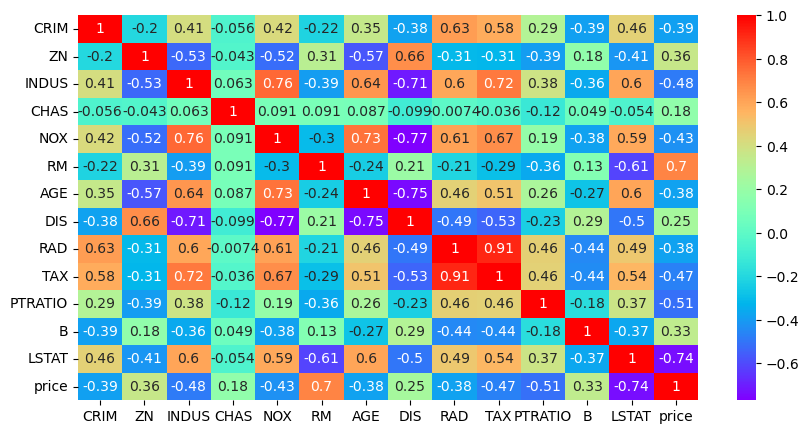

In [154]:
# Constructing a heatmap to understand the correlation better
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

In [155]:
# Splitting the data into dependent and independent
x=df.drop(['price'],axis=1)
y=df['price']

In [156]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [157]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [158]:
# Splitting the data into training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2)

In [159]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
37,0.08014,0.0,5.96,0.0,0.499,5.850,41.5,3.9342,5.0,279.0,19.2,396.90,8.77
286,0.01965,80.0,1.76,0.0,0.385,6.230,31.5,9.0892,1.0,241.0,18.2,341.60,12.93
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
25,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47


In [160]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
463,5.82115,0.0,18.10,0.0,0.713,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12
291,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
183,0.10008,0.0,2.46,0.0,0.488,6.563,95.6,2.8470,3.0,193.0,17.8,396.90,5.68
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
129,0.88125,0.0,21.89,0.0,0.624,5.637,94.7,1.9799,4.0,437.0,21.2,396.90,18.34
194,0.01439,60.0,2.93,0.0,0.401,6.604,18.8,6.2196,1.0,265.0,15.6,376.70,4.38


In [161]:
y_train

321    23.1
37     21.0
286    20.1
2      34.7
25     13.9
       ... 
22     15.2
72     22.8
493    21.8
15     19.9
168    23.8
Name: price, Length: 404, dtype: float64

In [162]:
y_test

463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
       ... 
200    32.9
12     21.7
129    14.3
194    29.1
320    23.8
Name: price, Length: 102, dtype: float64

In [163]:
# Training Linear Regression Model
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [164]:
# Evaluation
lr_pred=lr_model.predict(x_test)
lr_pred

array([23.01506153, 21.2115869 , 33.71590384, 31.56542369,  3.1826268 ,
        3.15381954, 27.40305304, 22.2126176 , 14.86506114, 21.34105453,
       30.95942941, 26.70065029, 21.12624382, 18.37282564, 17.64315354,
       25.38194186, 24.42970445, 13.36957057,  8.66686786, 18.57490534,
       21.73966467, 20.34270529, 36.5461105 , 20.59627495, 19.87979627,
       15.75766967, 37.11632999, 34.85897895, 30.83458635, 23.23441285,
       18.68278505, 20.749546  , 31.84560076, 30.20214207, 13.3861702 ,
       15.87078398, 13.70766096, 23.74163998, 25.95135088, 23.18325878,
       28.99906539, 12.50341936, 31.08347911,  6.39401895, 23.71801218,
       20.61523929, 33.15362417, 19.21862493, 35.89603081,  0.82365329,
       31.90288611, 31.69640543,  6.58849712, 34.62762996, 20.41162545,
       19.69277608, 19.53445865, 18.58689088, 15.81420496, 22.98764309,
       19.65947045, 16.36377019, 18.48783369, 32.76568172, 35.49022568,
       24.58349631, 41.5854766 , 32.94818456, 14.60990256, 27.43

In [165]:
y_test

463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
       ... 
200    32.9
12     21.7
129    14.3
194    29.1
320    23.8
Name: price, Length: 102, dtype: float64

In [166]:
lr_r2_sco=r2_score(lr_pred,y_test)
lr_r2_sco

0.7579300660483774

In [167]:
mse=mean_squared_error(lr_pred,y_test)
mse

18.4954201224484

In [168]:
rmse=np.sqrt(mse)
rmse

4.300630200615766

In [169]:
# Training Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [170]:
# Evaluation
rf_pred=rf_model.predict(x_test)
rf_pred

array([22.022, 21.123, 32.673, 28.727,  8.24 , 13.931, 28.138, 28.55 ,
       31.564, 20.683, 25.955, 24.216, 20.425, 20.644, 11.527, 22.755,
       17.929, 11.077,  8.528, 15.223, 23.433, 20.057, 34.27 , 19.292,
       15.207, 19.012, 42.923, 32.823, 34.215, 19.983, 20.51 , 20.589,
       30.864, 24.917, 12.306, 15.695, 10.431, 21.527, 22.052, 21.387,
       25.614, 14.605, 31.415,  7.675, 21.571, 14.73 , 34.937, 16.428,
       31.036, 14.007, 29.218, 25.642,  6.958, 33.517, 33.787, 20.272,
       19.772, 19.733, 16.506, 21.43 , 20.87 , 21.626, 19.513, 29.897,
       31.516, 25.172, 48.868, 28.235, 11.332, 21.801, 16.82 ,  8.274,
       18.785, 18.13 , 27.202, 25.708, 22.107, 21.414, 20.164, 22.268,
       34.073, 18.313, 20.535, 30.148, 46.371, 36.495, 20.183, 22.364,
       29.88 , 20.893, 20.457, 20.039, 11.414, 34.863, 37.548,  9.778,
       44.   , 34.048, 20.634, 16.03 , 29.268, 23.685])

In [171]:
y_test

463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
       ... 
200    32.9
12     21.7
129    14.3
194    29.1
320    23.8
Name: price, Length: 102, dtype: float64

In [172]:
rf_r2_sco=r2_score(rf_pred,y_test)
acc_rf

0.8765858005762478

In [173]:
rf_mse=mean_squared_error(rf_pred,y_test)
rf_mse

10.103522656862745

In [174]:
rf_rmse=np.sqrt(rf_mse)

In [175]:
rf_rmse

3.1786038848624636

In [176]:
# Training XGBRegressor Model
from xgboost import XGBRegressor
reg=XGBRegressor()
reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [177]:
# Evaluation
reg_pred=reg.predict(x_test)
reg_pred

array([20.288406 , 20.60247  , 30.9758   , 29.910797 ,  8.624953 ,
       14.235525 , 23.523052 , 29.730324 , 31.97293  , 22.015892 ,
       27.946804 , 24.034412 , 20.771402 , 21.849985 , 12.024127 ,
       22.074675 , 18.487509 , 11.052485 ,  8.141267 , 15.730722 ,
       23.163914 , 20.233883 , 35.700928 , 19.041637 , 15.129744 ,
       20.228016 , 47.067314 , 30.426474 , 32.729023 , 17.345776 ,
       17.889462 , 19.40687  , 30.769133 , 25.431686 , 12.05332  ,
       17.900238 , 11.031679 , 21.109531 , 20.64321  , 21.982754 ,
       25.016281 , 12.648555 , 31.042107 ,  7.106914 , 18.685764 ,
       14.380013 , 34.902393 , 16.130005 , 32.98537  , 10.950912 ,
       27.335018 , 29.399937 ,  7.0065055, 35.398712 , 22.978228 ,
       18.582758 , 19.224293 , 20.003431 , 15.341814 , 22.38517  ,
       19.077105 , 21.955967 , 18.91404  , 32.77595  , 32.76772  ,
       24.36317  , 48.262913 , 23.385014 , 10.551914 , 22.664684 ,
       14.671612 ,  8.881822 , 16.700302 , 17.221045 , 26.2046

In [178]:
y_test

463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
       ... 
200    32.9
12     21.7
129    14.3
194    29.1
320    23.8
Name: price, Length: 102, dtype: float64

In [179]:
xgb_r2_sco=r2_score(reg_pred,y_test)
xgb_r2_sco

0.8606673938010311

In [180]:
reg_mse=mean_squared_error(reg_pred,y_test)
reg_mse

10.778208363555285

In [181]:
reg_rmse=np.sqrt(reg_mse)
reg_rmse

3.283018178986416

In [182]:
# Comparision of all the models
models=pd.DataFrame({'Model':['Linear Regression','Random Forest','XGBoost'],
                    'R2_Score':[lr_r2_sco*100,rf_r2_sco*100,xgb_r2_sco*100]})
models.sort_values(by='R2_Score',ascending=False)

,Model,R2_Score
1,Random Forest,86.155560
2,XGBoost,86.066739
0,Linear Regression,75.793007
